In [2]:
import numpy as np
import pandas as pd
from K_Means import K_Means
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
warnings.filterwarnings('ignore')

# Iris


In [3]:
iris = pd.read_csv('datasets/iris.csv')
iris_no_species = pd.read_csv('datasets/iris_no_species.csv')

In [4]:
def normalize_df(df: pd.DataFrame, columns: [str]) -> pd.DataFrame:
    for c in columns:
        min_value = df[c].min()
        max_value = df[c].max()

        df[c] = (df[c] - min_value)/(max_value - min_value)
    return df

In [5]:
iris_no_species = normalize_df(iris_no_species, iris_no_species.columns)

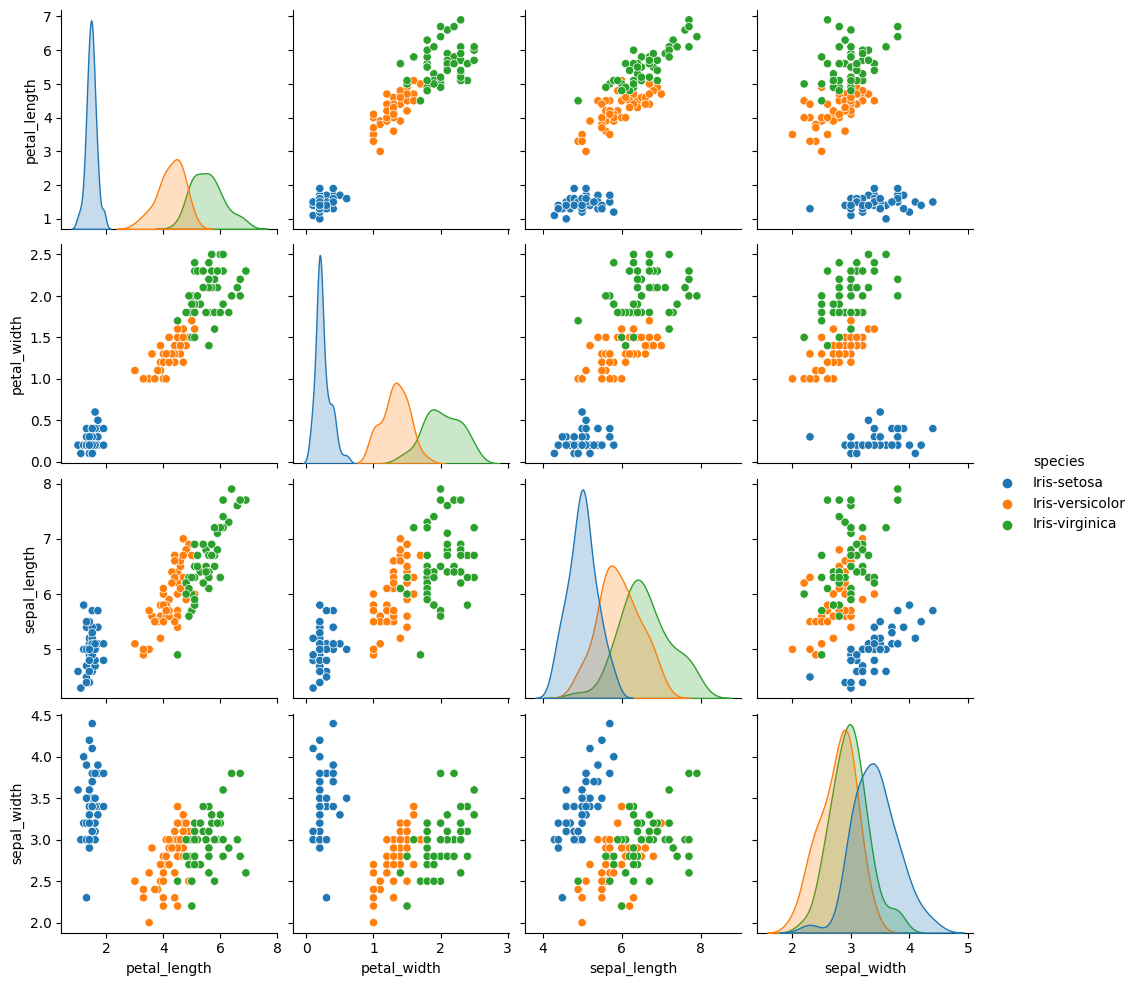

In [6]:
sns.pairplot(iris[sorted(iris.columns)], hue='species')
plt.show()

In [ ]:
kmeans = K_Means(iris_no_species, 2)
kmeans.train(1000)
sns.pairplot(kmeans.get_data(), hue='centroid_number', palette=sns.color_palette("tab10"))
plt.show()
kmeans.get_data()

Convergence reached in 20 iterations


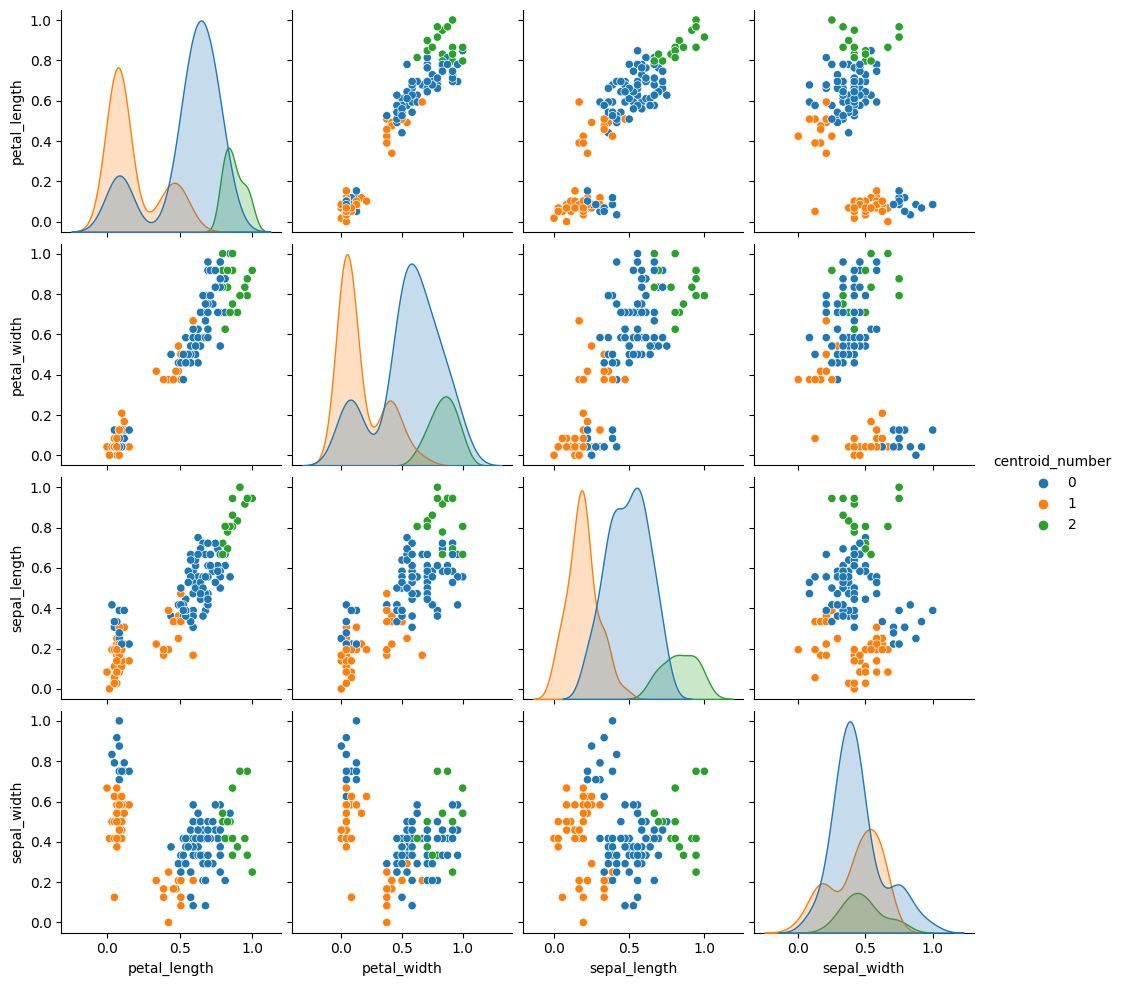

,petal_length,petal_width,sepal_length,sepal_width,centroid_number
0,0.067797,0.041667,0.222222,0.625000,1
1,0.067797,0.041667,0.166667,0.416667,1
2,0.050847,0.041667,0.111111,0.500000,1
3,0.084746,0.041667,0.083333,0.458333,1
4,0.067797,0.041667,0.194444,0.666667,1
...,...,...,...,...,...
145,0.711864,0.916667,0.666667,0.416667,0
146,0.677966,0.750000,0.555556,0.208333,0
147,0.711864,0.791667,0.611111,0.416667,0
148,0.745763,0.916667,0.527778,0.583333,0


In [14]:
kmeans = K_Means(iris_no_species, 3)
kmeans.train(1000)
sns.pairplot(kmeans.get_data(), hue='centroid_number', palette=sns.color_palette("tab10"))
plt.show()
kmeans.get_data()

In [ ]:
kmeans = K_Means(iris_no_species, 4)
kmeans.train(1000)
sns.pairplot(kmeans.get_data(), hue='centroid_number', palette=sns.color_palette("tab10"))
plt.show()
kmeans.get_data()

In [ ]:
kmeans = K_Means(iris_no_species, 5)
kmeans.train(1000)
sns.pairplot(kmeans.get_data(), hue='centroid_number', palette=sns.color_palette("tab10"))
plt.show()
kmeans.get_data()

# Segmentacion de colores

In [8]:
def reducing_colors(route: str, max_iter: int = 20, k: int=1):
    image_dir = route
    img = Image.open(image_dir)
    new_img = Image.open(image_dir)
    img = img.convert('RGB')
    width, height = img.size
    pixel_map = img.load()
    pixel_list = []
    for w in range(width):
        for h in range(height):
            pixel_list.append(list(pixel_map[w, h]))

    pixel_df = pd.DataFrame(data={'rgb': pixel_list})
    pixel_df['1r'] = pixel_df['rgb'].apply(lambda c: c[0])
    pixel_df['2g'] = pixel_df['rgb'].apply(lambda c: c[1])
    pixel_df['3b'] = pixel_df['rgb'].apply(lambda c: c[2])
    pixel_df.drop(columns=['rgb'], inplace=True)
    pixel_df = pixel_df[sorted(pixel_df.columns)]

    kmeans = K_Means(pixel_df, k)
    kmeans.train(max_iter)
    res = kmeans.get_data_with_new_category()

    new_map = res['centroid_value'].tolist()

    cur_color = 0
    for w in range(width):
        for h in range(height):
            (r,g,b) = new_map[cur_color]
            cur_color += 1
            new_img.putpixel((w, h), value=(r, g, b))        
    new_img.save(f"{route}_k={k}_max_iter={max_iter}.png")

In [9]:
reducing_colors('img/super_mario_bros_1.jpg', max_iter=30, k=8)

KeyboardInterrupt: 

In [ ]:
reducing_colors('img/super_mario_bros_1.jpg', max_iter=30, k=16)

Convergence reached in 30 iterations


In [ ]:
reducing_colors('img/super_mario_bros_1.jpg', max_iter=30, k=32)

Convergence reached in 30 iterations


In [ ]:
reducing_colors('img/super_mario_bros_1.jpg', max_iter=30, k=64)

Convergence reached in 30 iterations
hola
